Code :

https://www.kaggle.com/code/safurahajiheidari/yolov8-object-detection-on-self-driving-car-data

<div style="border: 2px solid darkred; /* Add border around the box */
           color: darkred;
           display: fill;
           border-radius: 5px;
           background-color: lightgray;
           font-size: 100%;
           font-family: Verdana;
           letter-spacing: 0.8px">
  <h1 style="padding: 20px 20px;  /* Equal padding on top and bottom */
           color: darkred;
           margin: 0; /* Remove default margin to prevent extra space */
           text-align: center;"><strong>YOLOv8 Object Detection on Self-Driving-Car                                                   Data</strong></h1>
</div>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[](http://https://bernardmarr.com/img/How%20Tesla%20Is%20Using%20Artificial%20Intelligence%20to%20Create%20The%20Autonomous%20Cars%20Of%20The%20Future.jpg)

![self_driving](https://bernardmarr.com/wp-content/uploads/2021/07/How-Tesla-Is-Using-Artificial-Intelligence-to-Create-The-Autonomous-Cars-Of-The-Future.jpg)

<div style="border: 2px solid darkred;
            color: darkred;
            display: fill;
            border-radius: 5px;
            background-color: lightgray;
            font-size: 100%;
            font-family: Verdana;
            letter-spacing: 0.4px;
            text-align: justify; /* Align text and create even lines */
            padding: 20px;"> <!-- Added padding to create paragraph shape -->
  <p style="margin: 0;"> <!-- Removed padding from the paragraph style -->
  <h5><strong>📌 What is YOLO?</strong></h5><br> You Only Look Once (YOLO) is a cutting-edge <strong>object detection</strong> method that significantly speeds up and simplifies the process of identifying objects in images and videos. Unlike traditional approaches, YOLO treats object detection as a single step, predicting object positions and categories directly.<br> By doing so, it achieves real-time detection without sacrificing accuracy. YOLO's neural network architecture processes images swiftly, making it valuable for applications like self-driving cars, surveillance, and robotics.<br> YOLO's unique approach has revolutionized object detection by making it faster and more accessible while maintaining high performance.
</p>
</div>


<div style="border: 2px solid darkred; /* Add border around the box */
            color: darkred;
            display: fill;
            border-radius: 5px;
            background-color: lightgray;
            font-size: 100%;
            font-family: Verdana;
            letter-spacing: 0.8px">
  <p style="padding: 20px 20px;  /* Equal padding on top and bottom */
            color: darkred;
            margin: 0; /* Remove default margin to prevent extra space */
            text-align: left;"><strong>Importing libraries:</strong><br> We've brought in NumPy to empower us for various numerical operations, while Matplotlib and PIL assist with visualization. Additionally, OpenCV (cv2) aids in advanced computer vision tasks, 'glob' helps with file handling, and 'random' provides randomness for diverse scenarios
</p>
</div>

In [2]:
import numpy as np
import PIL
import os
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2
import warnings
warnings.simplefilter('ignore')

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 kB 7.4 MB/s eta 0:00:00


<div style="border: 2px solid darkred; /* Add border around the box */
            color: darkred;
            display: fill;
            border-radius: 5px;
            background-color: lightgray;
            font-size: 100%;
            font-family: Verdana;
            letter-spacing: 0.8px">
  <p style="padding: 20px 20px;  /* Equal padding on top and bottom */
            color: darkred;
            margin: 0; /* Remove default margin to prevent extra space */
            text-align: left;">  <strong>📌 YOLOv8</strong> is a group of neural network models. These models were created and trained using PyTorch and exported to files with the <strong>.pt</strong> extension. In this project we use the <strong> yolov8m.pt</strong>
which is a middle-sized model for object detection.<br>All YOLOv8 models for object detection ship already pre-trained on the COCO dataset, which is a huge collection of images of 80 different types.
</p>
</div>


In [4]:
import ultralytics
from ultralytics import YOLO
yolo_model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 90.9MB/s]


<div style="border: 2px solid darkred; /* Add border around the box */
            color: darkred;
            display: fill;
            border-radius: 5px;
            background-color: lightgray;
            font-size: 100%;
            font-family: Verdana;
            letter-spacing: 0.8px">
  <p style="padding: 20px 20px;  /* Equal padding on top and bottom */
            color: darkred;
            margin: 0; /* Remove default margin to prevent extra space */
            text-align: left;">In this section we have loaded the <strong>self-driving-cars</strong> image dataset which is used for training and testing autonomous vehicle systems and is crucial for developing and evaluating the performance of self-driving algorithms and models. <br>Then we have
randomly selected some images to implement yolov8 model on them as samples.
</p>
</div>

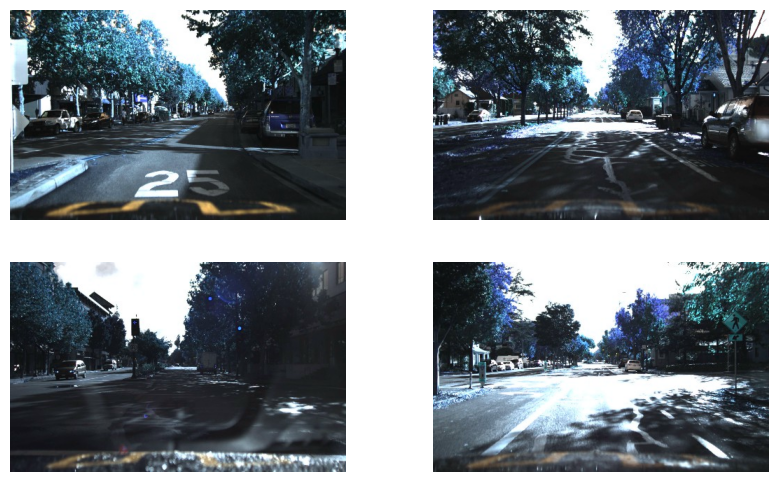

In [5]:
root_path = '/content/drive/MyDrive/Data/CNN/OD/images/*'
num_samples = 4
images_data = glob(root_path)
random_image = random.sample(images_data, num_samples)

plt.figure(figsize=(10,6))
for i in range(num_samples):
    plt.subplot(2,2,i+1)
    plt.imshow(cv2.imread(random_image[i]))
    plt.axis('off')


<div style="border: 2px solid darkred; /* Add border around the box */
            color: darkred;
            display: fill;
            border-radius: 5px;
            background-color: lightgray;
            font-size: 100%;
            font-family: Verdana;
            letter-spacing: 0.8px">
  <p style="padding: 20px 20px;  /* Equal padding on top and bottom */
            color: darkred;
            margin: 0; /* Remove default margin to prevent extra space */
            text-align: left;">In this section, we have extracted significant results from the pre-trained YOLOv8 model, including the <strong>'name of the detected object</strong>,' <strong>'bounding box coordinates'</strong>, and <strong>'detection probabilities'</strong>.<br> The results for the samples have been calculated separately.
</p>
</div>

In [6]:
# Create a list to store the images
images = []
for i in range(num_samples):
    yolo_outputs = yolo_model.predict(random_image[i])
    output = yolo_outputs[0]
    box = output.boxes
    names = output.names

    for j in range(len(box)):
        labels = names[box.cls[j].item()]
        coordinates = box.xyxy[j].tolist()
        confidence = np.round(box.conf[j].item(), 2)
        #print(f'In this image {len(box)} objects has been detected.')
        print(f'Object {j + 1} is: {labels}')
        print(f'Coordinates are: {coordinates}')
        print(f'Confidence is: {confidence}')
        print('-------')

    # Store the image in the 'images' list
    images.append(output.plot()[:, :, ::-1])



image 1/1 /content/drive/MyDrive/Data/CNN/OD/images/1478020330702034893.jpg: 416x640 1 person, 5 cars, 1 truck, 3110.5ms
Speed: 18.7ms preprocess, 3110.5ms inference, 30.5ms postprocess per image at shape (1, 3, 416, 640)



Object 1 is: car
Coordinates are: [102.81486511230469, 145.96908569335938, 146.6667022705078, 172.1186981201172]
Confidence is: 0.82
-------
Object 2 is: car
Coordinates are: [328.4463806152344, 142.5350341796875, 360.1167297363281, 176.07359313964844]
Confidence is: 0.78
-------
Object 3 is: truck
Coordinates are: [21.773815155029297, 141.92941284179688, 103.2803955078125, 179.69198608398438]
Confidence is: 0.69
-------
Object 4 is: car
Coordinates are: [352.8699951171875, 126.12277221679688, 435.8619079589844, 194.26473999023438]
Confidence is: 0.68
-------
Object 5 is: car
Coordinates are: [178.1490020751953, 145.11849975585938, 200.61654663085938, 162.07452392578125]
Confidence is: 0.56
-------
Object 6 is: person
Coordinates are: [159.0208740234375, 141.38864135742188, 165.96853637695312, 164.7718505859375]
Confidence is: 0.54
-------
Object 7 is: car
Coordinates are: [282.0357360839844, 142.329345703125, 291.412109375, 149.61062622070312]
Confidence is: 0.32
-------


image 1/1 /content/drive/MyDrive/Data/CNN/OD/images/1478020224691768528.jpg: 416x640 4 cars, 3565.8ms
Speed: 7.9ms preprocess, 3565.8ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)



Object 1 is: car
Coordinates are: [275.5350036621094, 142.3508758544922, 300.4245300292969, 160.6942901611328]
Confidence is: 0.84
-------
Object 2 is: car
Coordinates are: [48.29070281982422, 141.9933624267578, 82.64522552490234, 160.21258544921875]
Confidence is: 0.84
-------
Object 3 is: car
Coordinates are: [382.5278625488281, 119.91011810302734, 479.74981689453125, 213.64041137695312]
Confidence is: 0.72
-------
Object 4 is: car
Coordinates are: [249.00169372558594, 141.52017211914062, 259.5728759765625, 149.2268524169922]
Confidence is: 0.5
-------


image 1/1 /content/drive/MyDrive/Data/CNN/OD/images/1478020246196421177.jpg: 416x640 2 cars, 1 truck, 2 traffic lights, 1720.3ms
Speed: 2.9ms preprocess, 1720.3ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 640)



Object 1 is: car
Coordinates are: [62.83205795288086, 139.63609313964844, 109.40607452392578, 168.92514038085938]
Confidence is: 0.88
-------
Object 2 is: traffic light
Coordinates are: [172.8937225341797, 80.61721801757812, 185.34869384765625, 106.56639862060547]
Confidence is: 0.81
-------
Object 3 is: car
Coordinates are: [132.06344604492188, 140.03921508789062, 152.72337341308594, 155.6755828857422]
Confidence is: 0.59
-------
Object 4 is: truck
Coordinates are: [266.27874755859375, 128.7156524658203, 296.87664794921875, 159.4700927734375]
Confidence is: 0.45
-------
Object 5 is: traffic light
Coordinates are: [321.98779296875, 87.09127044677734, 334.5097351074219, 114.17765808105469]
Confidence is: 0.37
-------


image 1/1 /content/drive/MyDrive/Data/CNN/OD/images/1478020229693065514.jpg: 416x640 7 cars, 1780.1ms
Speed: 2.9ms preprocess, 1780.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)


Object 1 is: car
Coordinates are: [273.5283508300781, 139.46775817871094, 299.0023498535156, 158.0333709716797]
Confidence is: 0.86
-------
Object 2 is: car
Coordinates are: [264.25469970703125, 137.88232421875, 279.9070129394531, 151.93370056152344]
Confidence is: 0.69
-------
Object 3 is: car
Coordinates are: [98.41621398925781, 141.3474884033203, 116.94772338867188, 154.99388122558594]
Confidence is: 0.61
-------
Object 4 is: car
Coordinates are: [64.38404846191406, 138.82003784179688, 92.89700317382812, 157.5465087890625]
Confidence is: 0.55
-------
Object 5 is: car
Coordinates are: [90.76708221435547, 142.1378173828125, 104.27877807617188, 155.94126892089844]
Confidence is: 0.44
-------
Object 6 is: car
Coordinates are: [142.52001953125, 139.2334442138672, 157.70079040527344, 150.22572326660156]
Confidence is: 0.41
-------
Object 7 is: car
Coordinates are: [110.90559387207031, 137.52398681640625, 129.66246032714844, 153.28794860839844]
Confidence is: 0.37
-------


<div style="border: 2px solid darkred; /* Add border around the box */
            color: darkred;
            display: fill;
            border-radius: 5px;
            background-color: lightgray;
            font-size: 100%;
            font-family: Verdana;
            letter-spacing: 0.8px">
  <p style="padding: 20px 20px;  /* Equal padding on top and bottom */
            color: darkred;
            margin: 0; /* Remove default margin to prevent extra space */
            text-align: left;">In the last section, the results for the samples have been presented visually..
</p>
</div>



-------------------------------------- Images after object detection with YOLOV8 --------------------------------


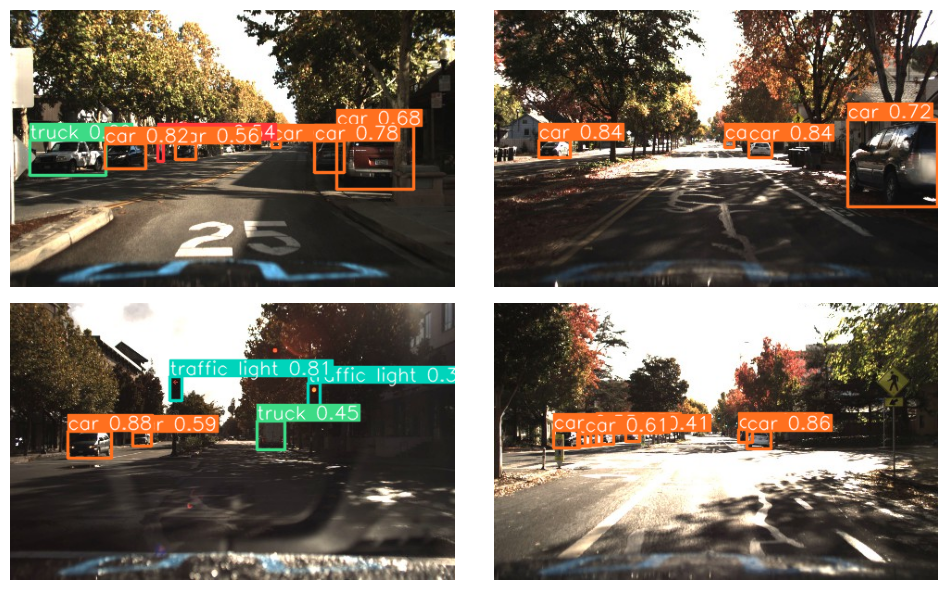

In [7]:
# plotting the images after object detection
print('\n\n-------------------------------------- Images after object detection with YOLOV8 --------------------------------')

plt.figure(figsize=(10,6))
for i, img in enumerate(images):
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
root_path = '/content/drive/MyDrive/Data/CNN/OD/fruits/*'
num_samples = 25
images_data = glob(root_path)
random_image = random.sample(images_data, num_samples)

plt.figure(figsize=(20,20))
for i in range(num_samples):
    plt.subplot(5,5,i+1)
    plt.imshow(cv2.cvtColor(cv2.imread(random_image[i], cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB))
    plt.axis('off')


Output hidden; open in https://colab.research.google.com to view.

<div style="border: 2px solid darkred; /* Add border around the box */
            color: darkred;
            display: fill;
            border-radius: 5px;
            background-color: lightgray;
            font-size: 100%;
            font-family: Verdana;
            letter-spacing: 0.8px">
  <p style="padding: 20px 20px;  /* Equal padding on top and bottom */
            color: darkred;
            margin: 0; /* Remove default margin to prevent extra space */
            text-align: left;">In this section, we have extracted significant results from the pre-trained YOLOv8 model, including the <strong>'name of the detected object</strong>,' <strong>'bounding box coordinates'</strong>, and <strong>'detection probabilities'</strong>.<br> The results for the samples have been calculated separately.
</p>
</div>

In [9]:
# Create a list to store the images
images = []
for i in range(num_samples):
    yolo_outputs = yolo_model.predict(random_image[i])
    output = yolo_outputs[0]
    box = output.boxes
    names = output.names

    for j in range(len(box)):
        labels = names[box.cls[j].item()]
        coordinates = box.xyxy[j].tolist()
        confidence = np.round(box.conf[j].item(), 2)
        #print(f'In this image {len(box)} objects has been detected.')
        print(f'Object {j + 1} is: {labels}')
        print(f'Coordinates are: {coordinates}')
        print(f'Confidence is: {confidence}')
        print('-------')

    # Store the image in the 'images' list
    images.append(output.plot()[:, :, ::-1])



image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/apple_48.jpg: 448x640 2 apples, 1527.4ms
Speed: 9.0ms preprocess, 1527.4ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)



Object 1 is: apple
Coordinates are: [129.35394287109375, 147.0480194091797, 544.7792358398438, 571.3500366210938]
Confidence is: 0.95
-------
Object 2 is: apple
Coordinates are: [424.03814697265625, 82.64269256591797, 714.9011840820312, 426.9624328613281]
Confidence is: 0.93
-------


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/banana_47.jpg: 512x640 (no detections), 1055.9ms
Speed: 2.4ms preprocess, 1055.9ms inference, 0.9ms postprocess per image at shape (1, 3, 512, 640)

image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/orange_54.jpg: 640x640 4 oranges, 1362.0ms
Speed: 3.3ms preprocess, 1362.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



Object 1 is: orange
Coordinates are: [112.36296844482422, 141.1745147705078, 499.7043762207031, 366.6399230957031]
Confidence is: 0.7
-------
Object 2 is: orange
Coordinates are: [1.4416694641113281, 38.208580017089844, 496.9098205566406, 450.9860534667969]
Confidence is: 0.67
-------
Object 3 is: orange
Coordinates are: [9.38115119934082, 179.2718505859375, 327.325927734375, 452.312255859375]
Confidence is: 0.67
-------
Object 4 is: orange
Coordinates are: [0.5050897598266602, 39.05034255981445, 341.5538635253906, 451.62200927734375]
Confidence is: 0.4
-------


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/orange_56.jpg: 544x640 4 oranges, 1145.9ms
Speed: 3.6ms preprocess, 1145.9ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)



Object 1 is: orange
Coordinates are: [210.55831909179688, 418.5373229980469, 1114.9381103515625, 1025.1790771484375]
Confidence is: 0.73
-------
Object 2 is: orange
Coordinates are: [5.414978981018066, 53.39220428466797, 692.4159545898438, 772.4918212890625]
Confidence is: 0.68
-------
Object 3 is: orange
Coordinates are: [2.1744935512542725, 9.280779838562012, 1259.375, 1039.125244140625]
Confidence is: 0.65
-------
Object 4 is: orange
Coordinates are: [621.2152709960938, 10.528636932373047, 1257.4254150390625, 676.172119140625]
Confidence is: 0.6
-------


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/orange_37.jpg: 544x640 1 orange, 1132.8ms
Speed: 2.9ms preprocess, 1132.8ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)



Object 1 is: orange
Coordinates are: [149.3255157470703, 62.577449798583984, 551.5073852539062, 465.3141174316406]
Confidence is: 0.97
-------


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/banana_74.jpg: 448x640 6 bananas, 958.2ms
Speed: 2.7ms preprocess, 958.2ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)



Object 1 is: banana
Coordinates are: [81.0475845336914, 0.8759365081787109, 708.24755859375, 194.70889282226562]
Confidence is: 0.64
-------
Object 2 is: banana
Coordinates are: [294.4498596191406, 228.7699432373047, 720.0, 433.1654968261719]
Confidence is: 0.59
-------
Object 3 is: banana
Coordinates are: [165.16819763183594, 99.04490661621094, 717.4891967773438, 468.3517761230469]
Confidence is: 0.55
-------
Object 4 is: banana
Coordinates are: [271.7926025390625, 4.6350202560424805, 719.5956420898438, 287.7199401855469]
Confidence is: 0.45
-------
Object 5 is: banana
Coordinates are: [84.59355926513672, 0.8403854370117188, 716.2015991210938, 287.14923095703125]
Confidence is: 0.39
-------
Object 6 is: banana
Coordinates are: [79.91716003417969, 0.0, 720.0, 464.4518127441406]
Confidence is: 0.33
-------


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/orange_49.jpg: 640x608 2 oranges, 1320.7ms
Speed: 4.6ms preprocess, 1320.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)



Object 1 is: orange
Coordinates are: [612.7334594726562, 532.80224609375, 1167.5233154296875, 1056.581787109375]
Confidence is: 0.97
-------
Object 2 is: orange
Coordinates are: [261.0238952636719, 276.57098388671875, 849.704833984375, 875.5341796875]
Confidence is: 0.78
-------


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/banana_43.jpg: 448x640 4 bananas, 933.1ms
Speed: 2.2ms preprocess, 933.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)



Object 1 is: banana
Coordinates are: [13.765939712524414, 61.54546356201172, 292.90509033203125, 285.254150390625]
Confidence is: 0.81
-------
Object 2 is: banana
Coordinates are: [100.53598022460938, 9.777234077453613, 423.3261413574219, 212.58970642089844]
Confidence is: 0.75
-------
Object 3 is: banana
Coordinates are: [150.01812744140625, 178.515625, 245.23178100585938, 251.90863037109375]
Confidence is: 0.36
-------
Object 4 is: banana
Coordinates are: [118.97028350830078, 21.63532829284668, 343.2294921875, 215.2968292236328]
Confidence is: 0.3
-------


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/apple_41.jpg: 544x640 1 vase, 1121.4ms
Speed: 2.7ms preprocess, 1121.4ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)



Object 1 is: vase
Coordinates are: [142.48306274414062, 55.920955657958984, 337.7709655761719, 242.4014892578125]
Confidence is: 0.92
-------


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/orange_44.jpg: 480x640 3 oranges, 1 potted plant, 1382.6ms
Speed: 2.3ms preprocess, 1382.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)



Object 1 is: orange
Coordinates are: [141.3155975341797, 120.43417358398438, 234.8483123779297, 222.63897705078125]
Confidence is: 0.95
-------
Object 2 is: orange
Coordinates are: [210.23692321777344, 5.791204452514648, 243.424560546875, 34.215003967285156]
Confidence is: 0.72
-------
Object 3 is: orange
Coordinates are: [230.5009307861328, 21.627666473388672, 265.4218444824219, 53.66023635864258]
Confidence is: 0.68
-------
Object 4 is: potted plant
Coordinates are: [0.3787119388580322, 121.96772766113281, 124.81194305419922, 257.0]
Confidence is: 0.44
-------


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/apple_43.jpg: 640x640 1 vase, 2230.3ms
Speed: 5.1ms preprocess, 2230.3ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)



Object 1 is: vase
Coordinates are: [191.86056518554688, 159.224365234375, 625.8488159179688, 597.022216796875]
Confidence is: 0.52
-------


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/apple_46.jpg: 480x640 13 apples, 1423.2ms
Speed: 4.3ms preprocess, 1423.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)



Object 1 is: apple
Coordinates are: [535.9452514648438, 52.53374099731445, 689.6182250976562, 176.66262817382812]
Confidence is: 0.91
-------
Object 2 is: apple
Coordinates are: [502.4354553222656, 0.22139787673950195, 574.3499755859375, 33.97149658203125]
Confidence is: 0.83
-------
Object 3 is: apple
Coordinates are: [7.83843994140625, 259.3619384765625, 206.07957458496094, 454.3885803222656]
Confidence is: 0.76
-------
Object 4 is: apple
Coordinates are: [310.5055847167969, 20.847110748291016, 518.5965576171875, 230.65325927734375]
Confidence is: 0.74
-------
Object 5 is: apple
Coordinates are: [610.5357055664062, 0.08229732513427734, 672.8434448242188, 20.599891662597656]
Confidence is: 0.73
-------
Object 6 is: apple
Coordinates are: [447.4261474609375, 178.89183044433594, 618.6688842773438, 294.6348876953125]
Confidence is: 0.7
-------
Object 7 is: apple
Coordinates are: [718.169189453125, 402.39166259765625, 799.7278442382812, 500.79132080078125]
Confidence is: 0.6
-------
Objec

image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/apple_28.jpg: 640x640 1 apple, 1344.9ms
Speed: 3.3ms preprocess, 1344.9ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)



Object 1 is: apple
Coordinates are: [25.309093475341797, 25.283601760864258, 271.7937316894531, 285.3544006347656]
Confidence is: 0.94
-------


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/banana_49.jpg: 320x640 1 banana, 668.9ms
Speed: 2.1ms preprocess, 668.9ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 640)



Object 1 is: banana
Coordinates are: [98.65784454345703, 66.91426849365234, 588.7640380859375, 243.70571899414062]
Confidence is: 0.94
-------


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/apple_25.jpg: 448x640 2 apples, 920.7ms
Speed: 2.4ms preprocess, 920.7ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)



Object 1 is: apple
Coordinates are: [16.451644897460938, 38.14109420776367, 173.45751953125, 203.5995635986328]
Confidence is: 0.94
-------
Object 2 is: apple
Coordinates are: [170.6820831298828, 29.414724349975586, 344.8948059082031, 200.09669494628906]
Confidence is: 0.94
-------


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/banana_62.jpg: 384x640 1 banana, 807.6ms
Speed: 1.5ms preprocess, 807.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Object 1 is: banana
Coordinates are: [60.813720703125, 49.070343017578125, 506.856689453125, 352.1635437011719]
Confidence is: 0.97
-------


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/banana_52.jpg: 256x640 3 bananas, 547.3ms
Speed: 1.4ms preprocess, 547.3ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Object 1 is: banana
Coordinates are: [118.60706329345703, 82.69783020019531, 292.78546142578125, 168.32347106933594]
Confidence is: 0.94
-------
Object 2 is: banana
Coordinates are: [310.5548400878906, 88.43204498291016, 487.6468505859375, 168.05731201171875]
Confidence is: 0.93
-------
Object 3 is: banana
Coordinates are: [16.649160385131836, 9.098630905151367, 134.84539794921875, 170.5750274658203]
Confidence is: 0.52
-------


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/orange_38.jpg: 640x640 1 orange, 1368.1ms
Speed: 3.3ms preprocess, 1368.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



Object 1 is: orange
Coordinates are: [20.222187042236328, 60.151947021484375, 495.79736328125, 452.0559387207031]
Confidence is: 0.9
-------


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/banana_64.jpg: 416x640 1 banana, 896.6ms
Speed: 2.9ms preprocess, 896.6ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)



Object 1 is: banana
Coordinates are: [117.04389953613281, 58.89478302001953, 589.6317138671875, 334.4216003417969]
Confidence is: 0.96
-------


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/apple_14.jpg: 448x640 2 apples, 2 oranges, 927.7ms
Speed: 2.9ms preprocess, 927.7ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)



Object 1 is: apple
Coordinates are: [294.9147033691406, 136.7094268798828, 675.0972290039062, 503.6500244140625]
Confidence is: 0.64
-------
Object 2 is: orange
Coordinates are: [321.2593994140625, 563.1764526367188, 383.618896484375, 626.1749267578125]
Confidence is: 0.5
-------
Object 3 is: orange
Coordinates are: [297.8600769042969, 137.02183532714844, 675.100830078125, 503.250732421875]
Confidence is: 0.46
-------
Object 4 is: apple
Coordinates are: [203.59471130371094, 136.19894409179688, 304.0166015625, 193.81375122070312]
Confidence is: 0.33
-------


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/apple_36.jpg: 640x640 1 orange, 1371.3ms
Speed: 4.3ms preprocess, 1371.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



Object 1 is: orange
Coordinates are: [9.192838668823242, 14.865876197814941, 153.14096069335938, 160.64730834960938]
Confidence is: 0.82
-------


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/orange_52.jpg: 640x640 3 oranges, 1986.9ms
Speed: 3.8ms preprocess, 1986.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Object 1 is: orange
Coordinates are: [216.62660217285156, 184.5417022705078, 401.00653076171875, 367.37823486328125]
Confidence is: 0.93
-------
Object 2 is: orange
Coordinates are: [360.99176025390625, 173.46038818359375, 490.8891906738281, 334.5430908203125]
Confidence is: 0.89
-------
Object 3 is: orange
Coordinates are: [368.9455261230469, 65.10236358642578, 474.12872314453125, 179.729248046875]
Confidence is: 0.48
-------


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/apple_31.jpg: 384x640 3 apples, 1380.9ms
Speed: 3.3ms preprocess, 1380.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)



Object 1 is: apple
Coordinates are: [301.4115295410156, 99.05750274658203, 779.701416015625, 432.3816833496094]
Confidence is: 0.93
-------
Object 2 is: apple
Coordinates are: [2.8808813095092773, 31.408586502075195, 390.8415222167969, 429.68963623046875]
Confidence is: 0.77
-------
Object 3 is: apple
Coordinates are: [2.867603302001953, 28.89071273803711, 780.0, 433.30572509765625]
Confidence is: 0.52
-------


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/apple_21.jpg: 448x640 3 apples, 1490.5ms
Speed: 1.9ms preprocess, 1490.5ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)



Object 1 is: apple
Coordinates are: [100.92593383789062, 121.885009765625, 330.73883056640625, 372.37506103515625]
Confidence is: 0.86
-------
Object 2 is: apple
Coordinates are: [304.0343017578125, 118.35139465332031, 596.6224365234375, 377.97332763671875]
Confidence is: 0.83
-------
Object 3 is: apple
Coordinates are: [99.0533447265625, 120.26187133789062, 606.502685546875, 378.6272888183594]
Confidence is: 0.34
-------


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/apple_24.jpg: 640x448 1 bowl, 2 apples, 975.6ms
Speed: 3.0ms preprocess, 975.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Object 1 is: apple
Coordinates are: [147.88662719726562, 728.7459716796875, 908.6878051757812, 1542.619873046875]
Confidence is: 0.97
-------
Object 2 is: bowl
Coordinates are: [0.0, 1.4699218273162842, 786.8857421875, 911.4595947265625]
Confidence is: 0.96
-------
Object 3 is: apple
Coordinates are: [0.0, 0.0, 606.7929077148438, 604.6124877929688]
Confidence is: 0.91
-------


<div style="border: 2px solid darkred; /* Add border around the box */
            color: darkred;
            display: fill;
            border-radius: 5px;
            background-color: lightgray;
            font-size: 100%;
            font-family: Verdana;
            letter-spacing: 0.8px">
  <p style="padding: 20px 20px;  /* Equal padding on top and bottom */
            color: darkred;
            margin: 0; /* Remove default margin to prevent extra space */
            text-align: left;">In the last section, the results for the samples have been presented visually..
</p>
</div>

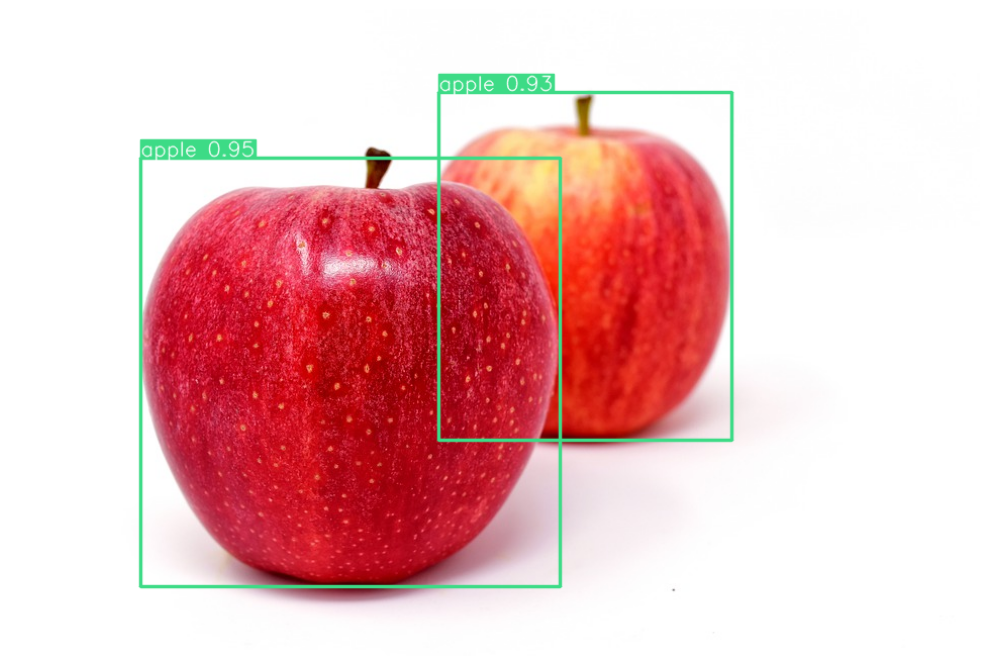

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(images[0])
plt.axis('off')
plt.tight_layout()
plt.show()

In [11]:
# plotting the images after object detection
print('\n\n-------------------------------------- Images after object detection with YOLOV8 --------------------------------')

plt.figure(figsize=(30,30))
for i, img in enumerate(images):
    plt.subplot(5,5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [12]:
def ODImage(image) :
  yolo_outputs = yolo_model.predict(image)
  output = yolo_outputs[0]
  box = output.boxes
  names = output.names
  for j in range(len(box)):
    labels = names[box.cls[j].item()]
    coordinates = box.xyxy[j].tolist()
    confidence = np.round(box.conf[j].item(), 2)
    print(f'Object {j + 1} is: {labels}')
    print(f'Coordinates are: {coordinates}')
    print(f'Confidence is: {confidence}')
    print('-------')
  NewImage = output.plot()[:, :, ::-1]
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.imshow(cv2.cvtColor(cv2.imread(image, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB))
  plt.title('Original Image')
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(NewImage)
  plt.axis('off')
  plt.title('OD Image')
  plt.show()


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/apple_1.jpg: 640x640 1 apple, 2144.2ms
Speed: 6.1ms preprocess, 2144.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Object 1 is: apple
Coordinates are: [26.148340225219727, 58.18088912963867, 309.49652099609375, 339.60260009765625]
Confidence is: 0.95
-------


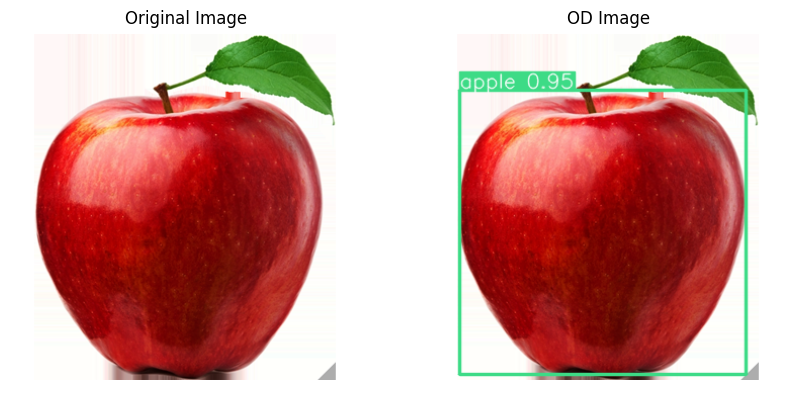

In [13]:
ODImage('/content/drive/MyDrive/Data/CNN/OD/fruits/apple_1.jpg')


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/apple_10.jpg: 640x640 1 apple, 2240.2ms
Speed: 6.0ms preprocess, 2240.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Object 1 is: apple
Coordinates are: [122.84660339355469, 146.9982147216797, 1417.890380859375, 1422.4510498046875]
Confidence is: 0.93
-------


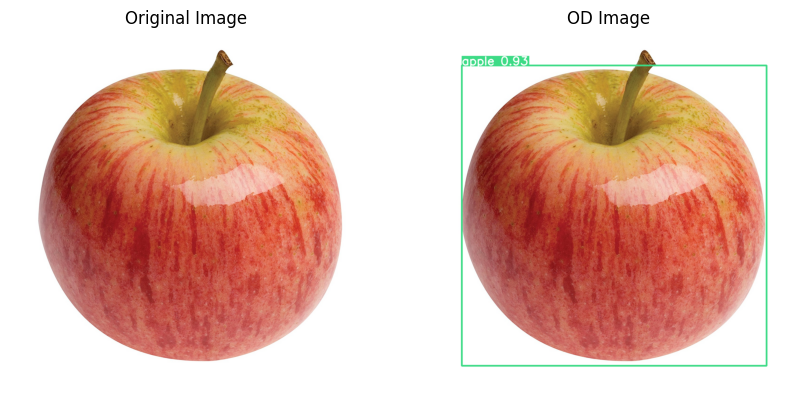

In [14]:
ODImage('/content/drive/MyDrive/Data/CNN/OD/fruits/apple_10.jpg')


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/banana_43.jpg: 448x640 4 bananas, 1114.6ms
Speed: 3.1ms preprocess, 1114.6ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


Object 1 is: banana
Coordinates are: [13.765939712524414, 61.54546356201172, 292.90509033203125, 285.254150390625]
Confidence is: 0.81
-------
Object 2 is: banana
Coordinates are: [100.53598022460938, 9.777234077453613, 423.3261413574219, 212.58970642089844]
Confidence is: 0.75
-------
Object 3 is: banana
Coordinates are: [150.01812744140625, 178.515625, 245.23178100585938, 251.90863037109375]
Confidence is: 0.36
-------
Object 4 is: banana
Coordinates are: [118.97028350830078, 21.63532829284668, 343.2294921875, 215.2968292236328]
Confidence is: 0.3
-------


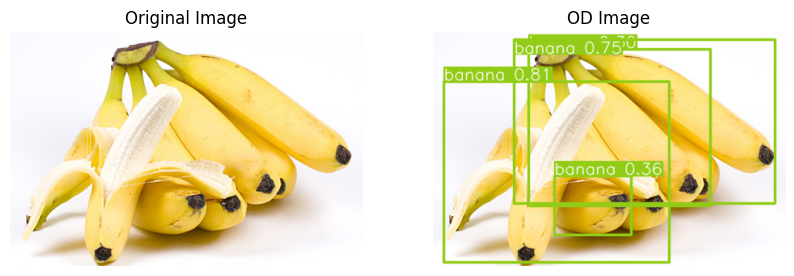

In [15]:
Path = '/content/drive/MyDrive/Data/CNN/OD/fruits'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/apple_41.jpg: 544x640 1 vase, 1165.6ms
Speed: 4.5ms preprocess, 1165.6ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)


Object 1 is: vase
Coordinates are: [142.48306274414062, 55.920955657958984, 337.7709655761719, 242.4014892578125]
Confidence is: 0.92
-------


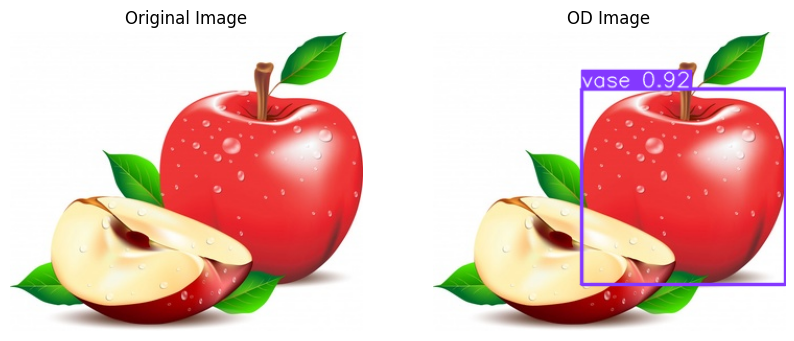

In [16]:
Path = '/content/drive/MyDrive/Data/CNN/OD/fruits'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/apple_14.jpg: 448x640 2 apples, 2 oranges, 949.5ms
Speed: 2.9ms preprocess, 949.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Object 1 is: apple
Coordinates are: [294.9147033691406, 136.7094268798828, 675.0972290039062, 503.6500244140625]
Confidence is: 0.64
-------
Object 2 is: orange
Coordinates are: [321.2593994140625, 563.1764526367188, 383.618896484375, 626.1749267578125]
Confidence is: 0.5
-------
Object 3 is: orange
Coordinates are: [297.8600769042969, 137.02183532714844, 675.100830078125, 503.250732421875]
Confidence is: 0.46
-------
Object 4 is: apple
Coordinates are: [203.59471130371094, 136.19894409179688, 304.0166015625, 193.81375122070312]
Confidence is: 0.33
-------


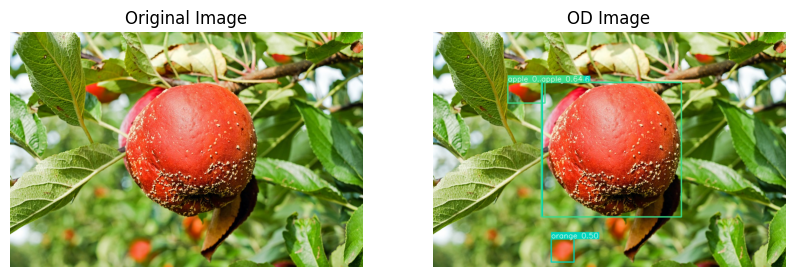

In [17]:
Path = '/content/drive/MyDrive/Data/CNN/OD/fruits'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/orange_49.jpg: 640x608 2 oranges, 1373.7ms
Speed: 9.9ms preprocess, 1373.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 608)


Object 1 is: orange
Coordinates are: [612.7334594726562, 532.80224609375, 1167.5233154296875, 1056.581787109375]
Confidence is: 0.97
-------
Object 2 is: orange
Coordinates are: [261.0238952636719, 276.57098388671875, 849.704833984375, 875.5341796875]
Confidence is: 0.78
-------


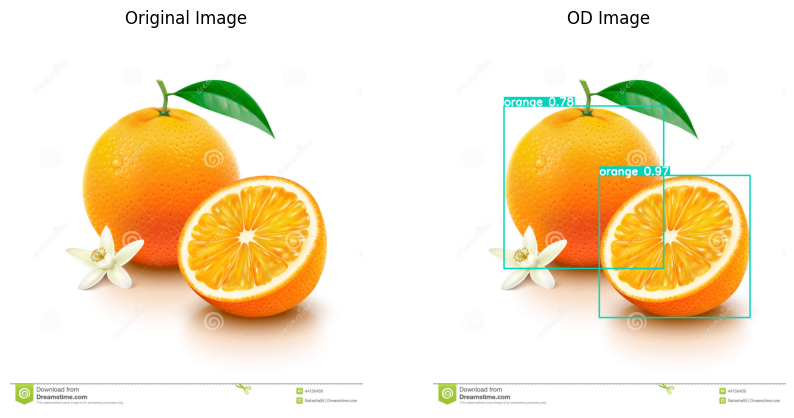

In [18]:
Path = '/content/drive/MyDrive/Data/CNN/OD/fruits'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/apple_40.jpg: 416x640 4 apples, 863.4ms
Speed: 3.9ms preprocess, 863.4ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Object 1 is: apple
Coordinates are: [82.88690185546875, 85.71566009521484, 362.4142150878906, 358.9954528808594]
Confidence is: 0.85
-------
Object 2 is: apple
Coordinates are: [329.2430419921875, 221.3817901611328, 572.362060546875, 371.94964599609375]
Confidence is: 0.75
-------
Object 3 is: apple
Coordinates are: [216.1785430908203, 24.19437599182129, 469.71160888671875, 233.93014526367188]
Confidence is: 0.64
-------
Object 4 is: apple
Coordinates are: [85.99002838134766, 18.44344139099121, 572.9525146484375, 372.6587219238281]
Confidence is: 0.53
-------


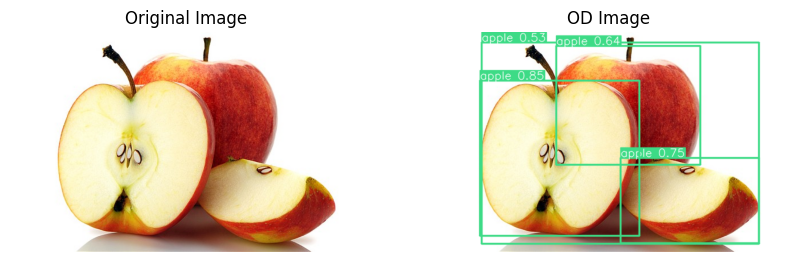

In [19]:
Path = '/content/drive/MyDrive/Data/CNN/OD/fruits'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/fruits/apple_29.jpg: 640x640 1 apple, 1373.1ms
Speed: 7.3ms preprocess, 1373.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Object 1 is: apple
Coordinates are: [44.71304702758789, 65.66045379638672, 218.350341796875, 231.23162841796875]
Confidence is: 0.59
-------


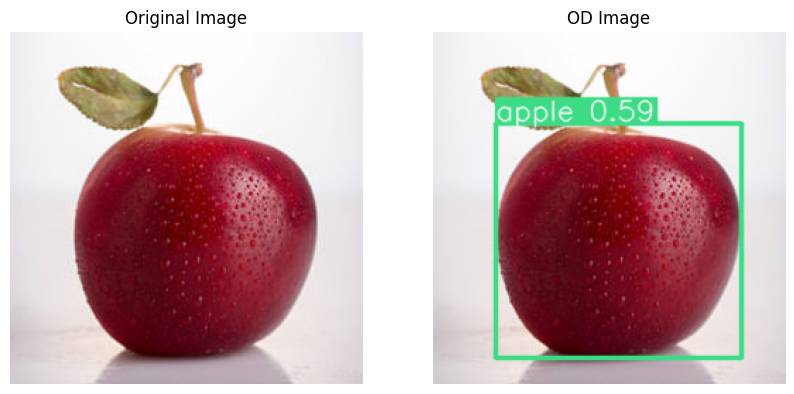

In [20]:
Path = '/content/drive/MyDrive/Data/CNN/OD/fruits'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/streets/vid_4_10040.jpg: 384x640 1 car, 1379.1ms
Speed: 3.1ms preprocess, 1379.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Object 1 is: car
Coordinates are: [246.39376831054688, 192.48561096191406, 350.9194030761719, 230.30691528320312]
Confidence is: 0.9
-------


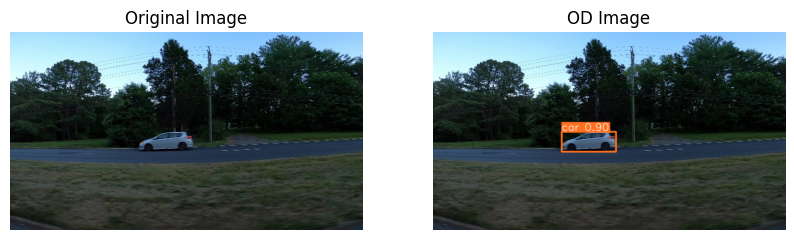

In [21]:
Path = '/content/drive/MyDrive/Data/CNN/OD/streets'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/streets/vid_4_11180.jpg: 384x640 (no detections), 803.1ms
Speed: 2.4ms preprocess, 803.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


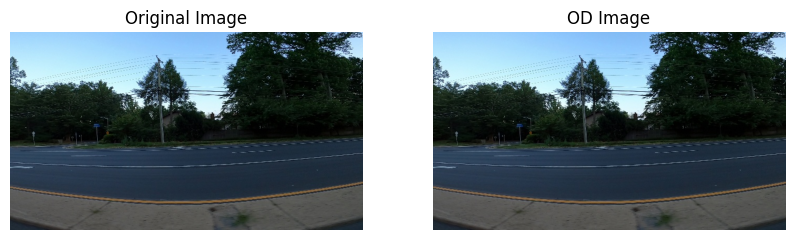

In [22]:
Path = '/content/drive/MyDrive/Data/CNN/OD/streets'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/streets/vid_4_10760.jpg: 384x640 (no detections), 792.5ms
Speed: 2.3ms preprocess, 792.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


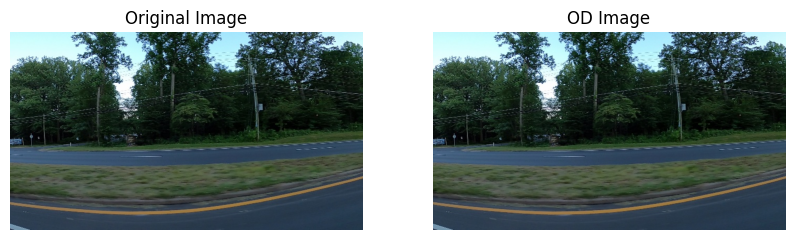

In [23]:
Path = '/content/drive/MyDrive/Data/CNN/OD/streets'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/streets/vid_4_10840.jpg: 384x640 1 bench, 836.3ms
Speed: 2.8ms preprocess, 836.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Object 1 is: bench
Coordinates are: [0.4914606213569641, 206.37364196777344, 33.5030403137207, 222.8225555419922]
Confidence is: 0.37
-------


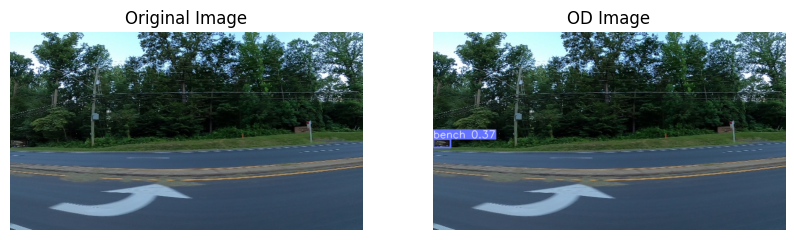

In [24]:
Path = '/content/drive/MyDrive/Data/CNN/OD/streets'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/digits/_20170604_175624.JPG: 512x640 1 clock, 1117.6ms
Speed: 3.6ms preprocess, 1117.6ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Object 1 is: clock
Coordinates are: [161.64308166503906, 150.26805114746094, 937.292236328125, 561.382568359375]
Confidence is: 0.77
-------


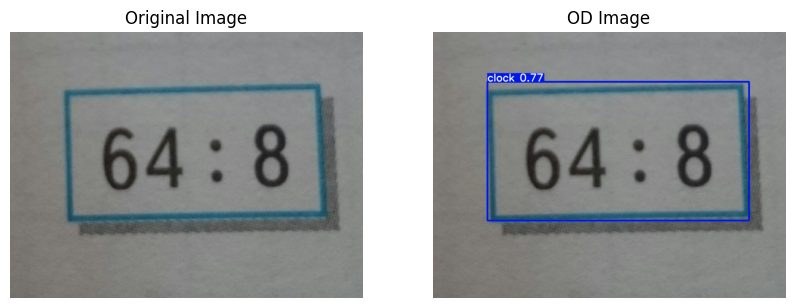

In [25]:
Path = '/content/drive/MyDrive/Data/CNN/OD/digits'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/digits/_20170604_174201.JPG: 416x640 (no detections), 884.9ms
Speed: 2.7ms preprocess, 884.9ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)


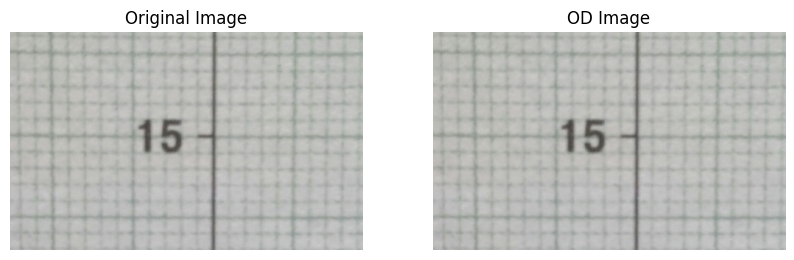

In [26]:
Path = '/content/drive/MyDrive/Data/CNN/OD/digits'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/digits/_20170531_114926.JPG: 352x640 (no detections), 1254.1ms
Speed: 5.7ms preprocess, 1254.1ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 640)


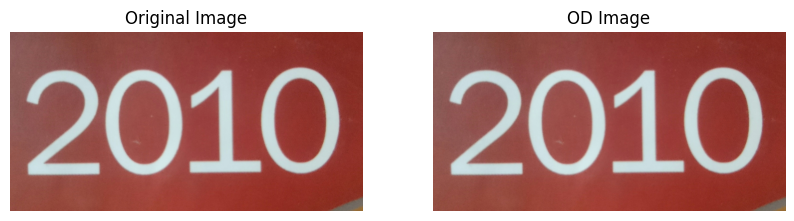

In [27]:
Path = '/content/drive/MyDrive/Data/CNN/OD/digits'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/drones/55.JPEG: 384x640 1 airplane, 860.1ms
Speed: 3.2ms preprocess, 860.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Object 1 is: airplane
Coordinates are: [933.978515625, 9.865264892578125, 1443.5467529296875, 411.4783630371094]
Confidence is: 0.75
-------


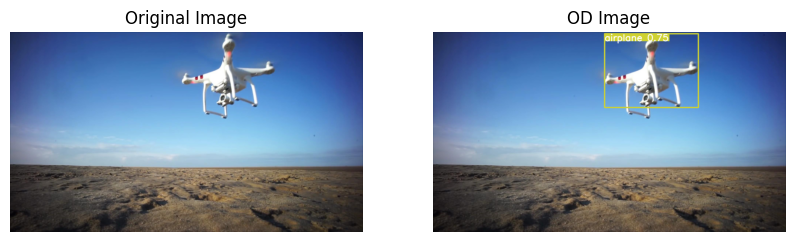

In [28]:
Path = '/content/drive/MyDrive/Data/CNN/OD/drones'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/drones/71.JPEG: 384x640 2 persons, 1 airplane, 1 backpack, 855.3ms
Speed: 3.0ms preprocess, 855.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Object 1 is: person
Coordinates are: [1146.0552978515625, 662.5953979492188, 1376.0654296875, 1081.8358154296875]
Confidence is: 0.79
-------
Object 2 is: backpack
Coordinates are: [1240.77978515625, 777.4749755859375, 1455.4949951171875, 1083.040283203125]
Confidence is: 0.78
-------
Object 3 is: airplane
Coordinates are: [524.4632568359375, 55.95864486694336, 582.6529541015625, 96.21121978759766]
Confidence is: 0.66
-------
Object 4 is: person
Coordinates are: [273.1998596191406, 843.44091796875, 285.97174072265625, 872.6890869140625]
Confidence is: 0.35
-------


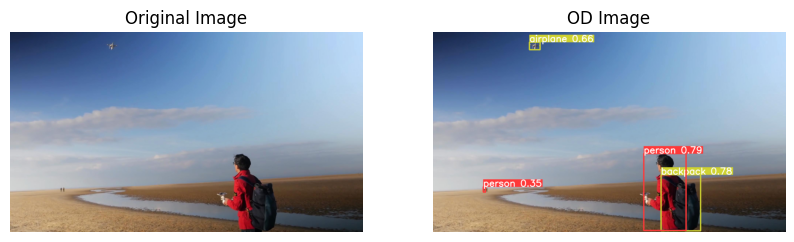

In [29]:
Path = '/content/drive/MyDrive/Data/CNN/OD/drones'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/drones/51.JPEG: 416x640 1 airplane, 879.7ms
Speed: 2.9ms preprocess, 879.7ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Object 1 is: airplane
Coordinates are: [277.1423645019531, 59.47603225708008, 893.7042236328125, 414.245361328125]
Confidence is: 0.59
-------


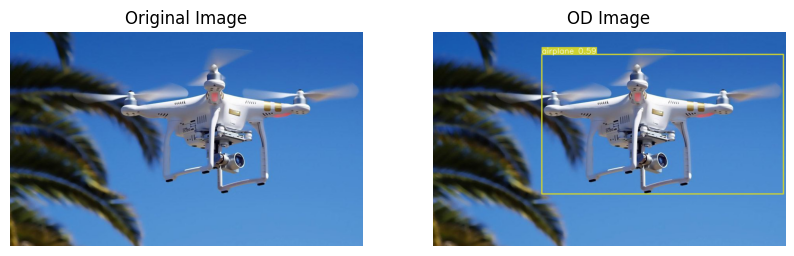

In [30]:
Path = '/content/drive/MyDrive/Data/CNN/OD/drones'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/drones/7.JPEG: 384x640 4 cars, 4 trucks, 1337.0ms
Speed: 3.4ms preprocess, 1337.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Object 1 is: car
Coordinates are: [2757.2470703125, 302.09619140625, 3055.7119140625, 462.7415771484375]
Confidence is: 0.87
-------
Object 2 is: truck
Coordinates are: [546.3885498046875, 332.65899658203125, 1087.231201171875, 545.0221557617188]
Confidence is: 0.86
-------
Object 3 is: car
Coordinates are: [1.0210418701171875, 429.4046936035156, 122.9977798461914, 565.1339721679688]
Confidence is: 0.76
-------
Object 4 is: truck
Coordinates are: [297.00201416015625, 344.75372314453125, 582.7064208984375, 550.6723022460938]
Confidence is: 0.76
-------
Object 5 is: truck
Coordinates are: [3425.510009765625, 174.84014892578125, 3838.802490234375, 560.1436767578125]
Confidence is: 0.73
-------
Object 6 is: truck
Coordinates are: [14.168678283691406, 355.6028137207031, 326.9775390625, 544.5469360351562]
Confidence is: 0.73
-------
Object 7 is: car
Coordinates are: [3646.00341796875, 411.4329528808594, 3838.435546875, 556.5031127929688]
Confidence is: 0.49
-------
Object 8 is: car
Coordinat

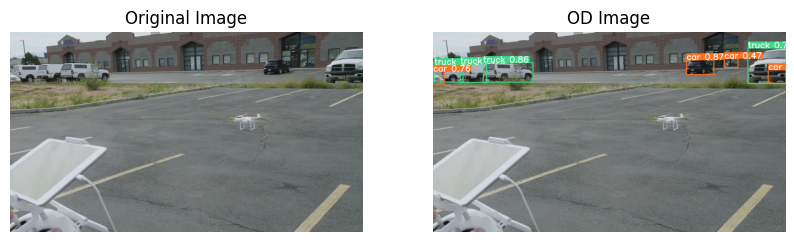

In [31]:
Path = '/content/drive/MyDrive/Data/CNN/OD/drones'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/drones/45.JPEG: 384x640 1 airplane, 803.3ms
Speed: 2.5ms preprocess, 803.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Object 1 is: airplane
Coordinates are: [470.7934265136719, 196.47213745117188, 718.186279296875, 413.2176818847656]
Confidence is: 0.76
-------


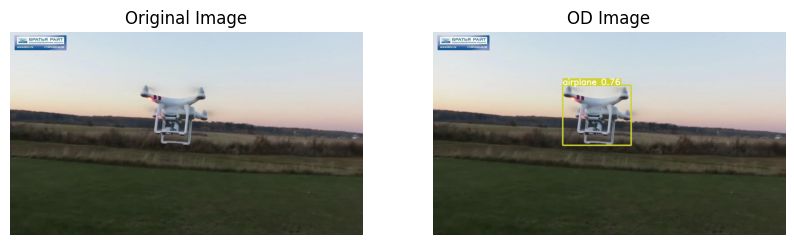

In [32]:
Path = '/content/drive/MyDrive/Data/CNN/OD/drones'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/flowers/0004.jpg: 640x480 (no detections), 1045.9ms
Speed: 3.1ms preprocess, 1045.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


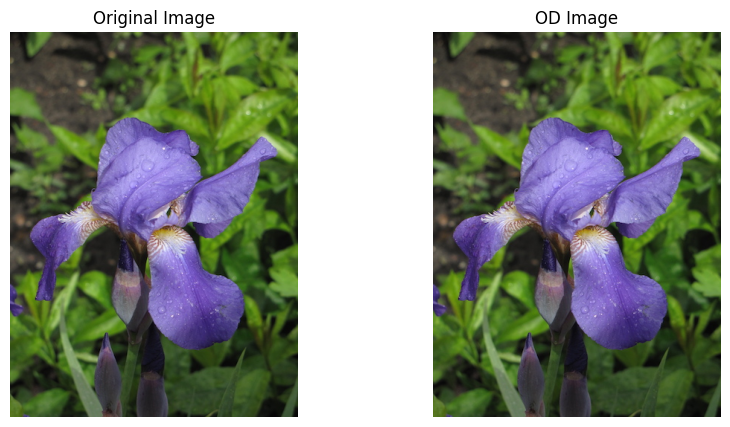

In [33]:
Path = '/content/drive/MyDrive/Data/CNN/OD/flowers'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/flowers/0025.jpg: 480x640 (no detections), 999.1ms
Speed: 2.9ms preprocess, 999.1ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


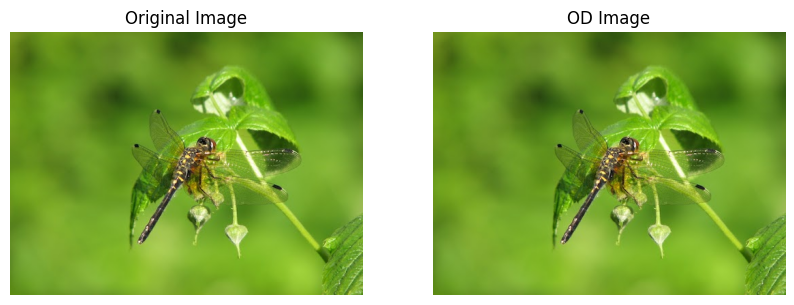

In [34]:
Path = '/content/drive/MyDrive/Data/CNN/OD/flowers'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/flowers/0021.jpg: 640x480 1 potted plant, 1008.3ms
Speed: 2.7ms preprocess, 1008.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Object 1 is: potted plant
Coordinates are: [1.148928165435791, 14.74886417388916, 360.2891540527344, 515.103271484375]
Confidence is: 0.44
-------


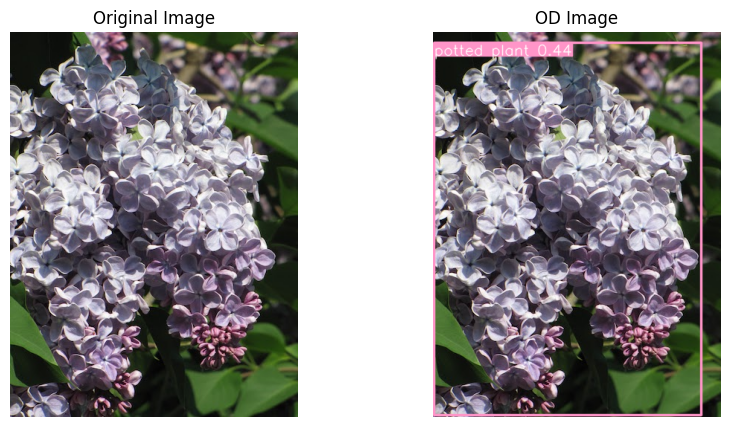

In [35]:
Path = '/content/drive/MyDrive/Data/CNN/OD/flowers'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/flowers/0015.jpg: 640x480 (no detections), 1050.2ms
Speed: 2.7ms preprocess, 1050.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


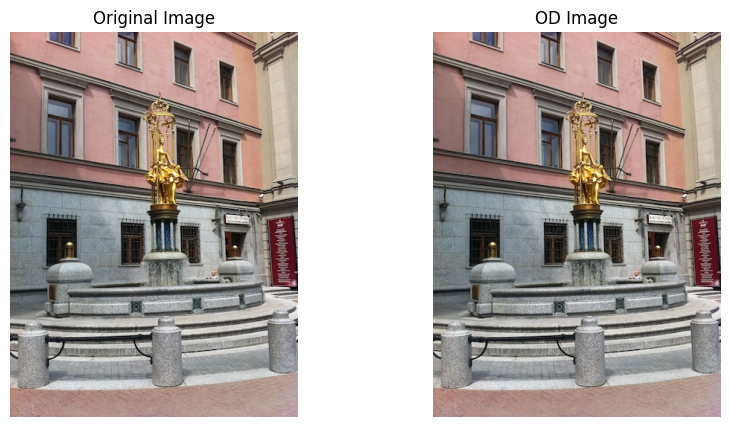

In [36]:
Path = '/content/drive/MyDrive/Data/CNN/OD/flowers'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/flowers/0030.jpg: 480x640 (no detections), 1711.9ms
Speed: 4.4ms preprocess, 1711.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


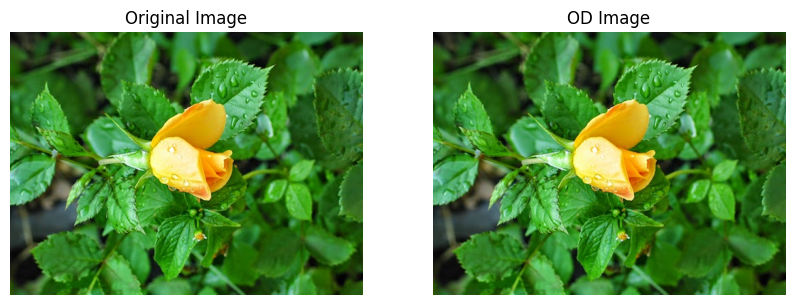

In [37]:
Path = '/content/drive/MyDrive/Data/CNN/OD/flowers'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/guns/62.jpeg: 384x640 (no detections), 845.0ms
Speed: 2.1ms preprocess, 845.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


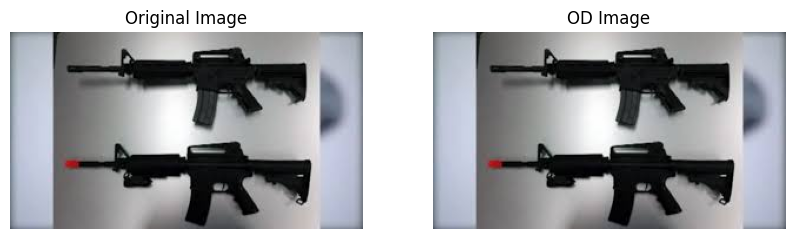

In [38]:
Path = '/content/drive/MyDrive/Data/CNN/OD/guns'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/guns/44.jpeg: 640x352 (no detections), 798.1ms
Speed: 2.0ms preprocess, 798.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 352)


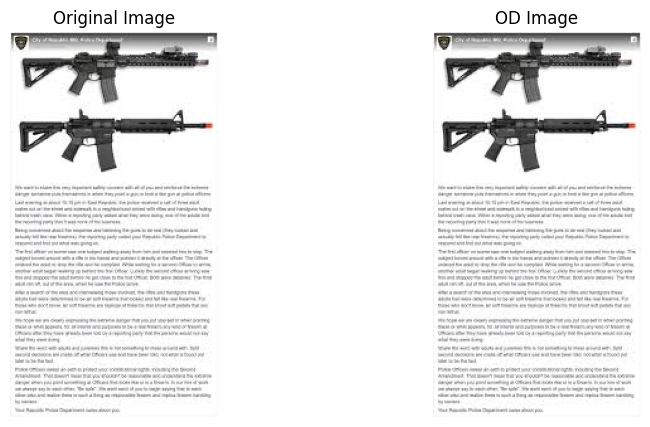

In [39]:
Path = '/content/drive/MyDrive/Data/CNN/OD/guns'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/guns/15.jpeg: 288x640 1 person, 1 bottle, 1 cake, 1 potted plant, 1 cell phone, 617.9ms
Speed: 1.6ms preprocess, 617.9ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 640)


Object 1 is: person
Coordinates are: [120.53181457519531, 3.271249532699585, 220.62649536132812, 124.61991882324219]
Confidence is: 0.92
-------
Object 2 is: bottle
Coordinates are: [308.6551818847656, 96.67029571533203, 320.39337158203125, 131.06385803222656]
Confidence is: 0.74
-------
Object 3 is: potted plant
Coordinates are: [25.580631256103516, 68.430419921875, 46.29780960083008, 118.31880187988281]
Confidence is: 0.65
-------
Object 4 is: cake
Coordinates are: [201.83639526367188, 121.02627563476562, 224.11427307128906, 135.96646118164062]
Confidence is: 0.34
-------
Object 5 is: cell phone
Coordinates are: [124.1356201171875, 83.31185150146484, 160.04226684570312, 94.05000305175781]
Confidence is: 0.32
-------


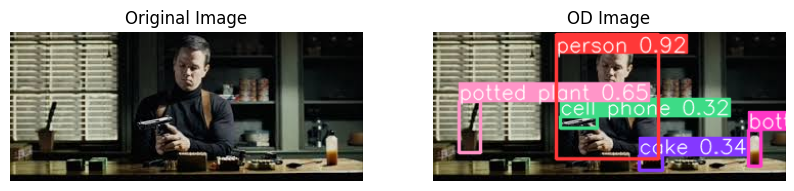

In [40]:
Path = '/content/drive/MyDrive/Data/CNN/OD/guns'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/guns/22.jpeg: 640x416 1 person, 939.0ms
Speed: 3.1ms preprocess, 939.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Object 1 is: person
Coordinates are: [0.0, 12.523733139038086, 148.74142456054688, 274.343994140625]
Confidence is: 0.83
-------


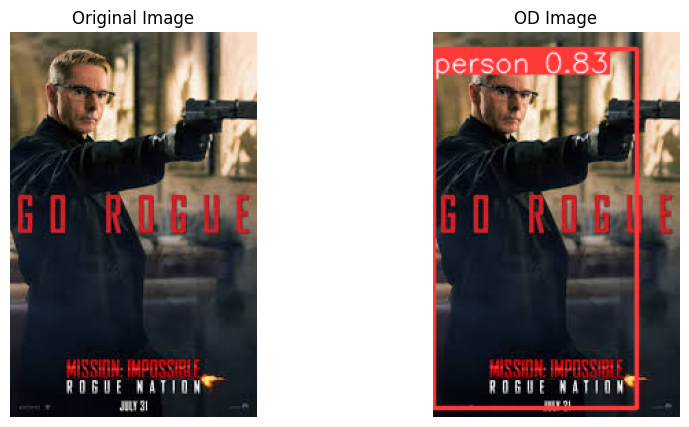

In [41]:
Path = '/content/drive/MyDrive/Data/CNN/OD/guns'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/People/00000850.jpg: 448x640 11 persons, 1 traffic light, 2 backpacks, 920.9ms
Speed: 2.5ms preprocess, 920.9ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Object 1 is: person
Coordinates are: [31.150901794433594, 98.28680419921875, 377.5848693847656, 395.2532958984375]
Confidence is: 0.95
-------
Object 2 is: person
Coordinates are: [356.3991394042969, 212.26934814453125, 395.8670959472656, 313.4603576660156]
Confidence is: 0.78
-------
Object 3 is: person
Coordinates are: [475.4732666015625, 204.8951416015625, 516.3799438476562, 322.5809020996094]
Confidence is: 0.77
-------
Object 4 is: person
Coordinates are: [441.4019775390625, 213.24464416503906, 482.9461975097656, 327.05584716796875]
Confidence is: 0.75
-------
Object 5 is: person
Coordinates are: [333.3126525878906, 213.04417419433594, 356.8006591796875, 292.20489501953125]
Confidence is: 0.73
-------
Object 6 is: person
Coordinates are: [505.54901123046875, 202.59767150878906, 534.914794921875, 306.68304443359375]
Confidence is: 0.72
-------
Object 7 is: person
Coordinates are: [566.3783569335938, 180.5118408203125, 599.7476196289062, 375.3432312011719]
Confidence is: 0.65
------

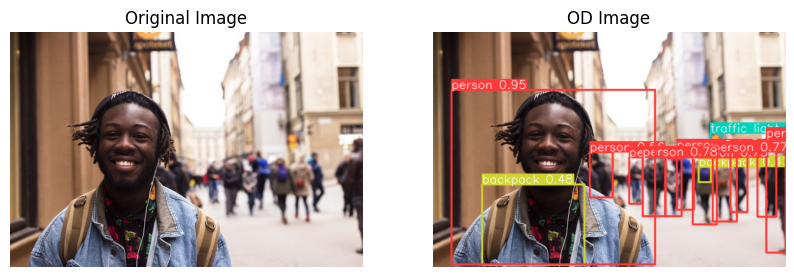

In [42]:
Path = '/content/drive/MyDrive/Data/CNN/OD/People'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/People/00000848.jpg: 448x640 1 person, 1154.4ms
Speed: 3.3ms preprocess, 1154.4ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Object 1 is: person
Coordinates are: [395.8441162109375, 93.94912719726562, 984.2841186523438, 989.5725708007812]
Confidence is: 0.96
-------


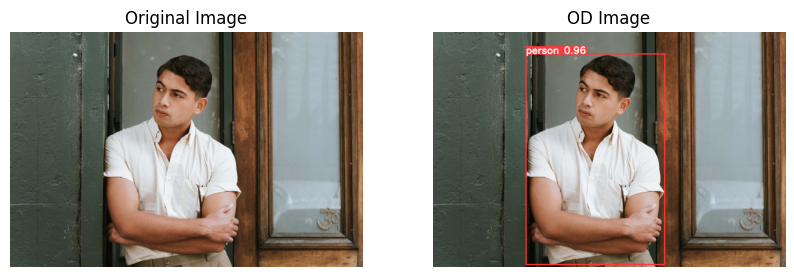

In [43]:
Path = '/content/drive/MyDrive/Data/CNN/OD/People'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/People/00000849.jpg: 640x416 1 person, 1528.6ms
Speed: 3.8ms preprocess, 1528.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 416)


Object 1 is: person
Coordinates are: [171.024169921875, 33.277244567871094, 484.848388671875, 992.3102416992188]
Confidence is: 0.96
-------


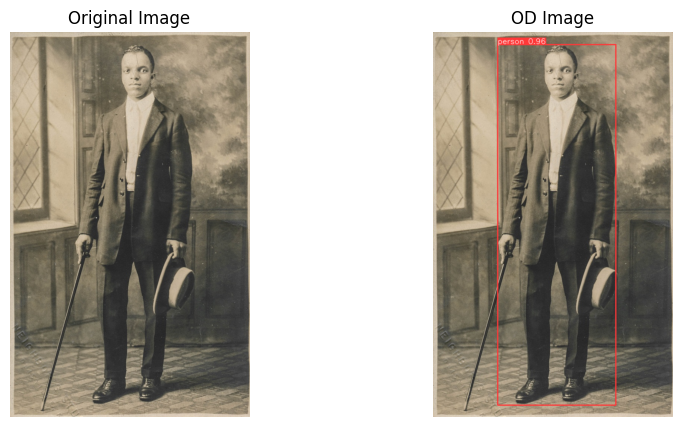

In [44]:
Path = '/content/drive/MyDrive/Data/CNN/OD/People'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/People/00000772.jpg: 512x640 1 person, 1070.2ms
Speed: 3.0ms preprocess, 1070.2ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


Object 1 is: person
Coordinates are: [56.101566314697266, 45.50611114501953, 312.5953674316406, 453.57025146484375]
Confidence is: 0.96
-------


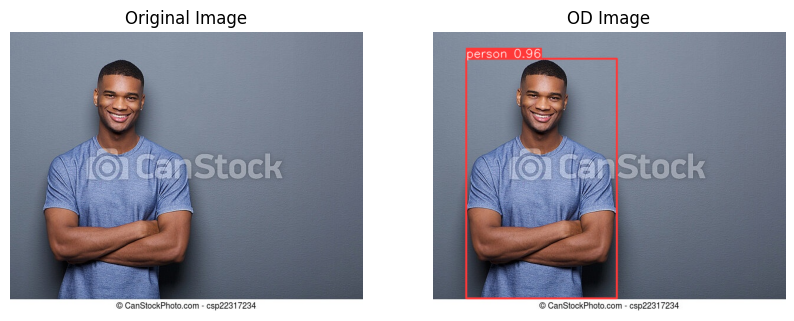

In [45]:
Path = '/content/drive/MyDrive/Data/CNN/OD/People'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))


image 1/1 /content/drive/MyDrive/Data/CNN/OD/People/00000774.jpg: 640x448 1 person, 1010.4ms
Speed: 3.3ms preprocess, 1010.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Object 1 is: person
Coordinates are: [125.5141830444336, 109.6577377319336, 642.5016479492188, 1102.4464111328125]
Confidence is: 0.96
-------


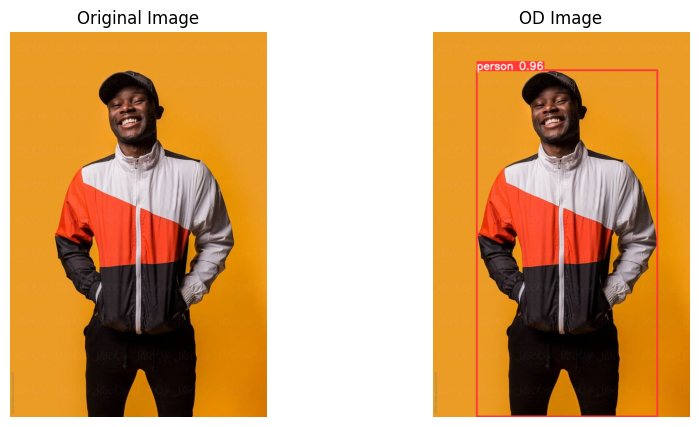

In [46]:
Path = '/content/drive/MyDrive/Data/CNN/OD/People'
ODImage(os.path.join(Path, np.random.choice(os.listdir(Path))))